In [1]:
import os

ROOT = r"C:\Users\priya\food_dataset"   
print("Exists?", os.path.exists(ROOT))
print("Inside ROOT:", os.listdir(ROOT)[:20])  


Exists? True
Inside ROOT: ['indian_food.csv']


In [3]:
import os

IMG_EXTS = ('.jpg','.jpeg','.png','.bmp','.gif','.JPG','.JPEG','.PNG','.BMP','.GIF')

def count_images(path):
    try:
        return sum(
            1 for f in os.listdir(path)
            if os.path.isfile(os.path.join(path,f)) and f.endswith(IMG_EXTS)
        )
    except Exception:
        return 0

def find_class_root(root):
    
    subdirs = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root,d))]
    classes_lvl1 = [d for d in subdirs if count_images(os.path.join(root,d))>0]
    if classes_lvl1:
        return root, sorted(classes_lvl1)

    
    for d in subdirs:
        cand = os.path.join(root, d)
        subsub = [ss for ss in os.listdir(cand) if os.path.isdir(os.path.join(cand, ss))]
        classes_lvl2 = [ss for ss in subsub if count_images(os.path.join(cand, ss))>0]
        if classes_lvl2:
            return cand, sorted(classes_lvl2)

   
    return root, []

CLASS_ROOT, CLASSES = find_class_root(ROOT)
print("CLASS_ROOT:", CLASS_ROOT)
print("Detected classes (folders with images):", CLASSES)


CLASS_ROOT: C:\Users\priya\food_dataset
Detected classes (folders with images): []


In [4]:
import os

data_dir = r"C:\Users\priya\food_dataset"
print("Exists?", os.path.exists(data_dir))
print("Classes:", os.listdir(data_dir))


Exists? True
Classes: ['.ipynb_checkpoints', 'Chole_Bhature', 'Pizza']


In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

data_dir = r"C:\Users\priya\food_dataset"

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

print("✅ Classes detected:", train_ds.class_names)


Found 50 files belonging to 2 classes.
Using 40 files for training.
Found 50 files belonging to 2 classes.
Using 10 files for validation.
✅ Classes detected: ['Chole_Bhature', 'Pizza']


In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import os


data_dir = r"C:\Users\priya\food_dataset"

# Create train/val datasets
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128,128),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128,128),
    batch_size=32
)


class_names = train_ds.class_names
print("✅ Classes detected:", class_names)


normalization_layer = layers.Rescaling(1./255)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y),
                        num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y),
                    num_parallel_calls=AUTOTUNE)

train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


model = keras.Sequential([
    keras.Input(shape=(128,128,3)), 
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax') 


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


save_path = r"C:\Users\priya\food_model.h5"
model.save(save_path)
print("✅ Model saved at:", save_path)


Found 50 files belonging to 2 classes.
Using 40 files for training.
Found 50 files belonging to 2 classes.
Using 10 files for validation.
✅ Classes detected: ['Chole_Bhature', 'Pizza']
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 845ms/step - accuracy: 0.5250 - loss: 1.4967 - val_accuracy: 0.3000 - val_loss: 0.7172
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.4500 - loss: 0.7123 - val_accuracy: 0.3000 - val_loss: 0.7337
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.6500 - loss: 0.6552 - val_accuracy: 0.7000 - val_loss: 0.6248
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.5500 - loss: 0.6144 - val_accuracy: 0.7000 - val_loss: 0.6101
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8000 - loss: 0.5621 - val_accuracy: 0.7000 - val_loss: 0.5740
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6500 - loss: 0.5044 - val_accuracy: 0.7000 - val_loss: 0.5565
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accurac

✅ Model saved at: C:\Users\priya\food_model.h5


In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model(r"C:\Users\priya\food_model.h5")

# Class names (same order as training)
class_names = ["Chole_Bhature", "Pizza"]

# Load any test image
img_path = r"C:\Users\priya\food_dataset\Pizza\00000002.jpg"  
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # add batch dim

# Prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions)

print(f"🍽 Prediction: {predicted_class} ({confidence*100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
🍽 Prediction: Pizza (97.94%)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

# Load trained model
model = keras.models.load_model("C:/Users/priya/food_model.h5")

# Class names
class_names = ["Chole_Bhature", "Pizza"]

def predict_food(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    preds = model.predict(img_array)
    score = tf.nn.softmax(preds[0])
    class_index = np.argmax(score)
    
    print(f"🍽 Prediction: {class_names[class_index]} ({100*np.max(score):.2f}%)")

# Example
predict_food("C:/Users/priya/food_dataset/Pizza/00000002.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
🍽 Prediction: Pizza (72.29%)


In [3]:
import os

print(os.listdir("C:/Users/priya/food_dataset/Chole_Bhature"))


['.ipynb_checkpoints', '00000000.jpg', '00000003.jpg', '00000005.jpg', '00000006.jpg', '00000007.jpg', '00000008.jpg', '00000009.jpg', '00000010.jpg', '00000013.jpg', '00000014.JPG', '00000015.jpg', '00000016.jpg', '00000017.jpg', '00000018.jpg', '00000019.jpg', '00000021.jpg', '00000023.jpg', '00000024.jpg', '00000025.jpg', '00000026.jpg']


In [4]:
predict_food("C:/Users/priya/food_dataset/Chole_Bhature/00000014.JPG")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
🍽 Prediction: Chole_Bhature (72.21%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


C:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


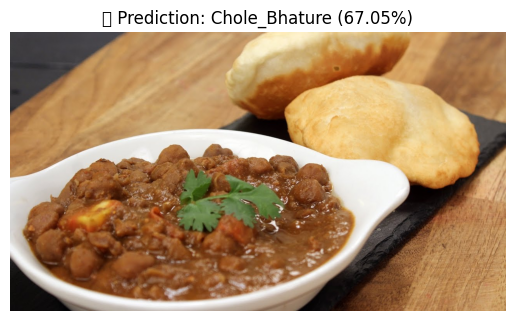

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = keras.models.load_model("C:/Users/priya/food_model.h5")


class_names = ["Chole_Bhature", "Pizza"]

def predict_and_show(img_path):
   
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    preds = model.predict(img_array)
    score = tf.nn.softmax(preds[0])
    class_index = np.argmax(score)
    predicted_label = class_names[class_index]
    confidence = 100 * np.max(score)

    
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"🍽 Prediction: {predicted_label} ({confidence:.2f}%)")
    plt.show()


predict_and_show("C:/Users/priya/food_dataset/Chole_Bhature/00000007.jpg")


In [ ]:
predict_and_show("C:/Users/priya/food_dataset/Pizza/00000002.jpg")


In [10]:
import warnings
warnings.filterwarnings("ignore")


In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  


In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
tf.get_logger().setLevel('ERROR')   


In [14]:
model = keras.models.load_model("C:/Users/priya/food_model.h5", compile=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


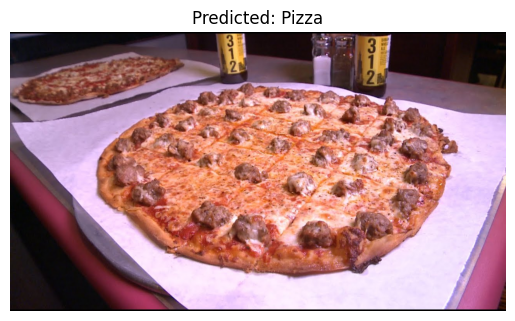


🍽 Prediction: Pizza (57.70%)
📊 Nutrition Info:
   Calories: 300 kcal
   Protein: 15g
   Carbs: 40g
   Fat: 12g
   Alternative: Opt for thin-crust veggie pizza with less cheese


In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Warnings ko band karne ke liye
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Model load
model = keras.models.load_model("C:/Users/priya/food_model.h5", compile=False)

# Class names
class_names = ["Chole_Bhature", "Pizza"]

# Nutrition data
nutrition_info = {
    "Chole_Bhature": {
        "Calories": "450 kcal",
        "Protein": "12g",
        "Carbs": "50g",
        "Fat": "20g",
        "Alternative": "Try steamed idli or chapati with chole instead of fried bhature"
    },
    "Pizza": {
        "Calories": "300 kcal",
        "Protein": "15g",
        "Carbs": "40g",
        "Fat": "12g",
        "Alternative": "Opt for thin-crust veggie pizza with less cheese"
    }
}

def predict_food(img_path):
    # Load image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Prediction
    preds = model.predict(img_array)
    score = tf.nn.softmax(preds[0])
    class_index = np.argmax(score)
    food_name = class_names[class_index]

    # Show image
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Predicted: {food_name}")
    plt.show()

    # Print results
    print(f"\n🍽 Prediction: {food_name} ({100*np.max(score):.2f}%)")
    print("📊 Nutrition Info:")
    for k, v in nutrition_info[food_name].items():
        print(f"   {k}: {v}")

# Example run
predict_food("C:/Users/priya/food_dataset/Pizza/00000005.jpg")
